# Data Pre-processing 

# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Importing the cvs file.

In [4]:
data = pd.read_csv("Rainfall weather.csv")

# Analysis The Data 

In [5]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
data.shape

(145460, 23)

# Handling missing Data

In [10]:
data['Date'] =pd.to_datetime(data['Date'])
data['year'] =data['Date'].dt.year
data['month'] =data['Date'].dt.month
data['day'] =data['Date'].dt.day
data.drop(['Date'], axis = 1,inplace=True) 
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [11]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


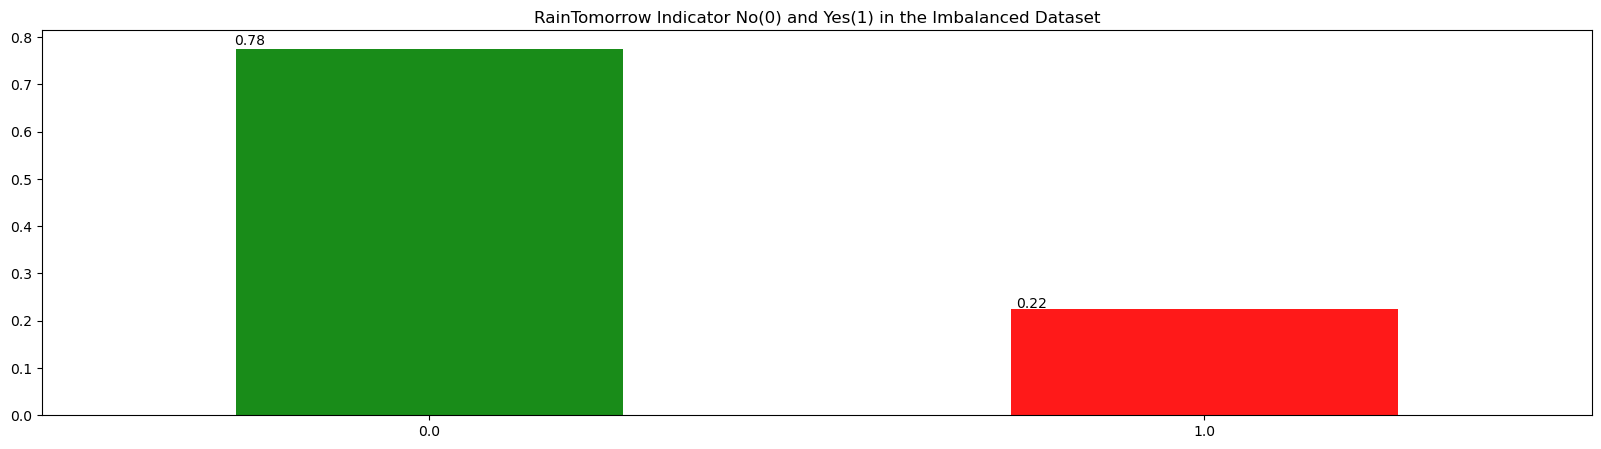

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,5))
ax=data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['green','red'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

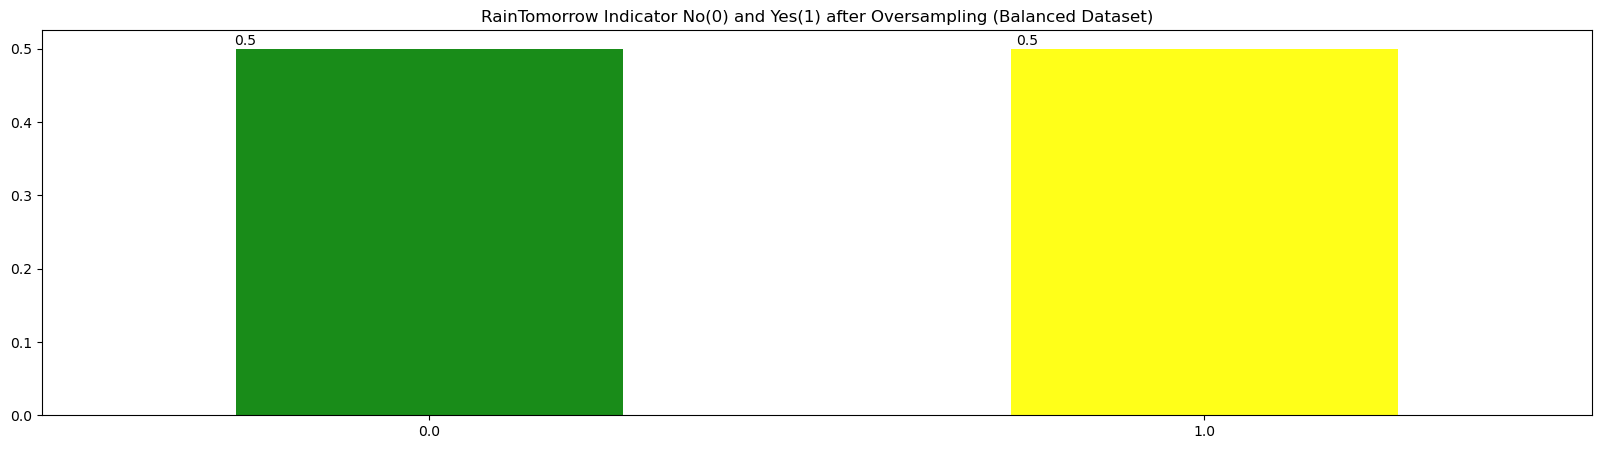

In [13]:
from sklearn.utils import resample

no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['green','yellow'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [14]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104711,0.474596
Evaporation,95325,0.432054
Cloud3pm,85658,0.388239
Cloud9am,81388,0.368886
Pressure9am,21620,0.097991


In [15]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [16]:
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [17]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [18]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [19]:
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Location         25.000000
MinTemp           9.200000
MaxTemp          10.200000
Rainfall          2.400000
Evaporation       4.117610
Sunshine          5.961704
WindGustDir       9.000000
WindGustSpeed    19.000000
WindDir9am        8.000000
WindDir3pm        8.000000
WindSpeed9am     13.000000
WindSpeed3pm     11.000000
Humidity9am      26.000000
Humidity3pm      30.000000
Pressure9am       8.700000
Pressure3pm       8.863859
Cloud9am          4.000000
Cloud3pm          3.697490
Temp9am           9.300000
Temp3pm           9.800000
RainToday         1.000000
RainTomorrow      1.000000
year              5.000000
month             5.000000
day              15.000000
dtype: float64


# Data Visualization

In [20]:
data.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,...,-0.461292,0.078754,0.021605,0.901821,0.708906,0.055836,0.083936,0.043263,-0.203833,0.002359
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,...,-0.427167,-0.289370,-0.277921,0.887210,0.984503,-0.229192,-0.159237,0.062044,-0.163884,0.000611
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,...,-0.126534,0.198528,0.172403,0.011192,-0.079657,0.501516,0.239032,-0.008956,-0.031371,0.001712
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,...,-0.293581,-0.183793,-0.182618,0.545115,0.572893,-0.186945,-0.119285,0.084344,-0.026805,-0.006051
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,...,-0.019719,-0.675323,-0.703930,0.291188,0.490501,-0.330522,-0.450768,0.008788,0.024327,-0.000397
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,...,-0.413749,0.071736,0.109168,0.150150,0.032748,0.155761,0.234010,-0.030572,0.061026,-0.009063
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,...,-0.175817,0.025112,0.054639,0.128545,0.004569,0.103057,0.090995,-0.018440,0.051277,-0.008786
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,...,-0.255439,0.053337,0.025396,0.163030,0.027778,0.080591,0.087817,-0.029775,0.060373,-0.009943
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,...,0.186858,0.452297,0.357326,-0.471354,-0.498399,0.353708,0.257161,0.009846,-0.090759,0.015166
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,...,0.051997,0.517120,0.523120,-0.221019,-0.557841,0.379020,0.446160,-0.009662,-0.018858,0.013013


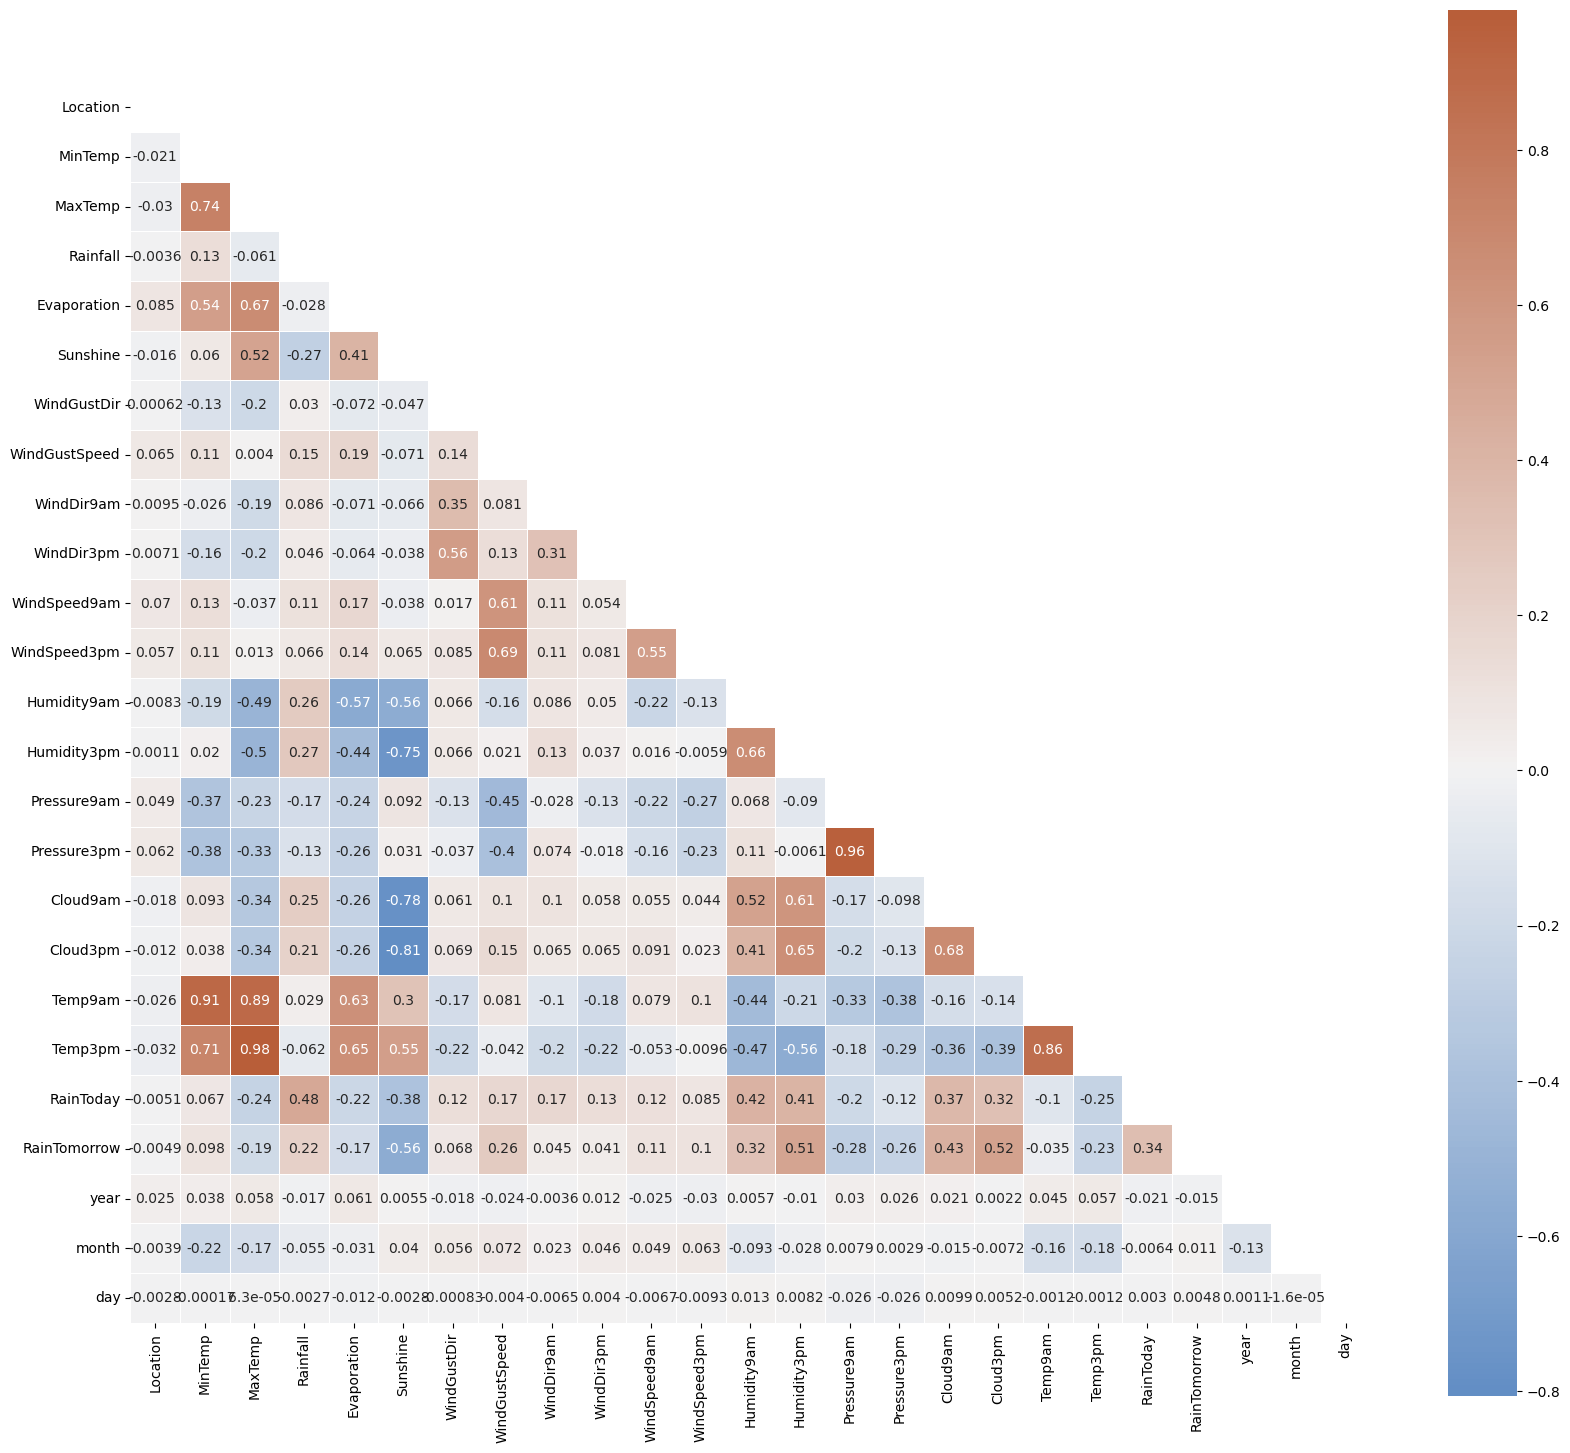

In [21]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [22]:
corr=data.corr

In [24]:
#sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm'), hue='RainTomorrow' )
#plt.show()

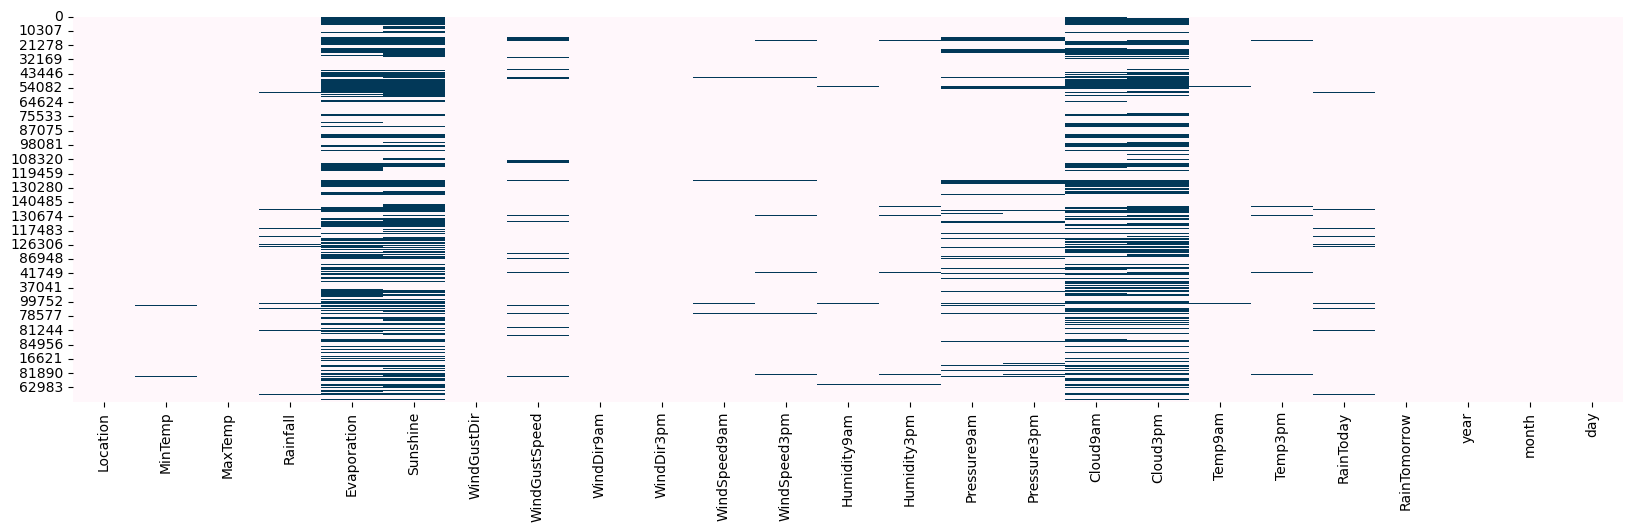

In [25]:
import seaborn as sns
plt.figure(figsize = (20,5))
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')
plt.show()

<AxesSubplot:>

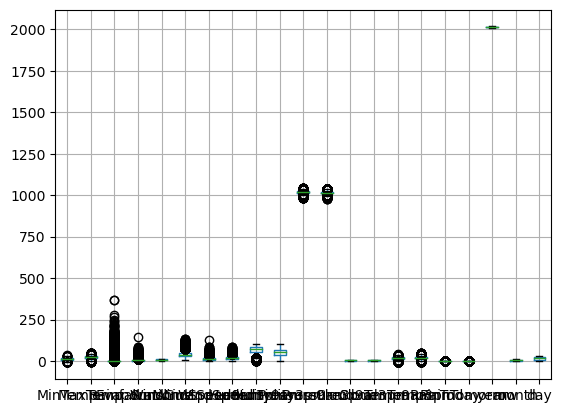

In [26]:
data.boxplot()

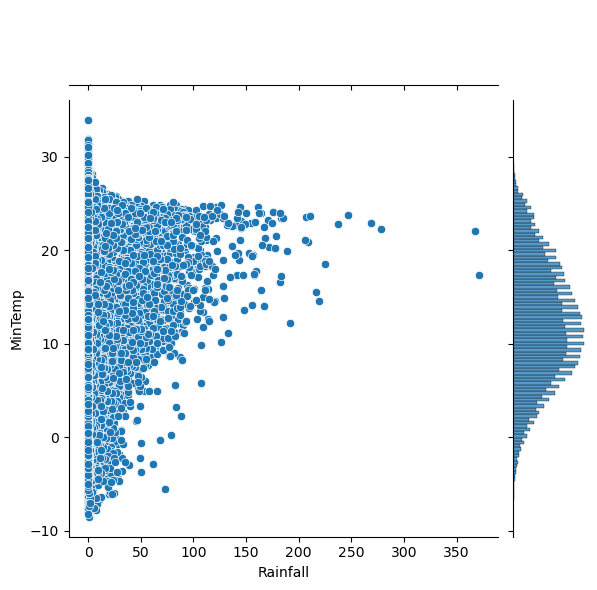

In [27]:
#sns.jointplot(data["MinTemp"],data['Rainfall'])
sns.jointplot(y='MinTemp',x='Rainfall',data=data)

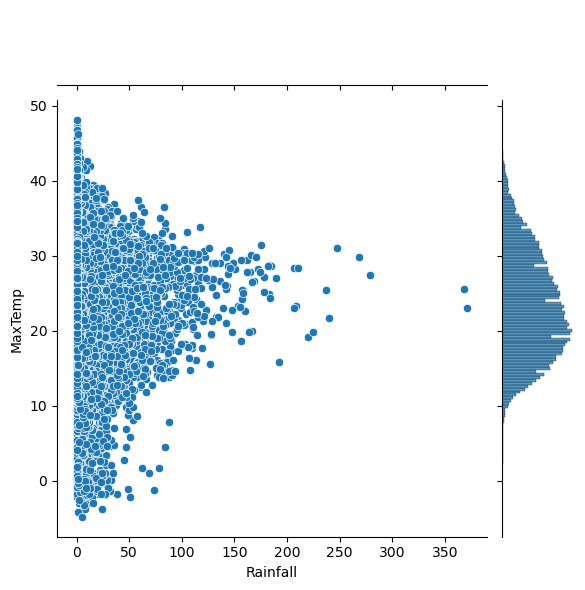

In [28]:
#sns.jointplot(data["MinTemp"],data['Rainfall'],hue=data['RainTomorrow'])
sns.jointplot(x='Rainfall',y='MaxTemp',data=data)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Count'>

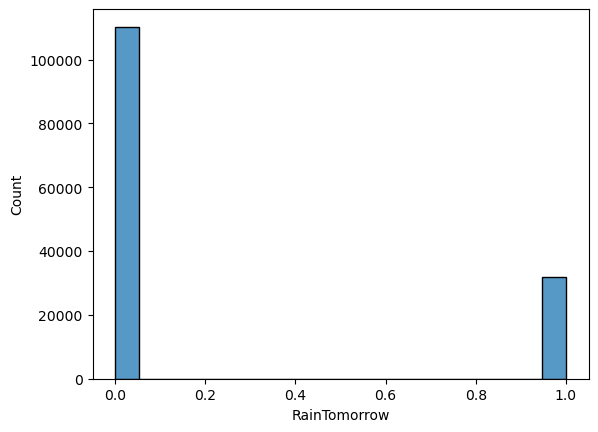

In [29]:
sns.histplot(data['RainTomorrow'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

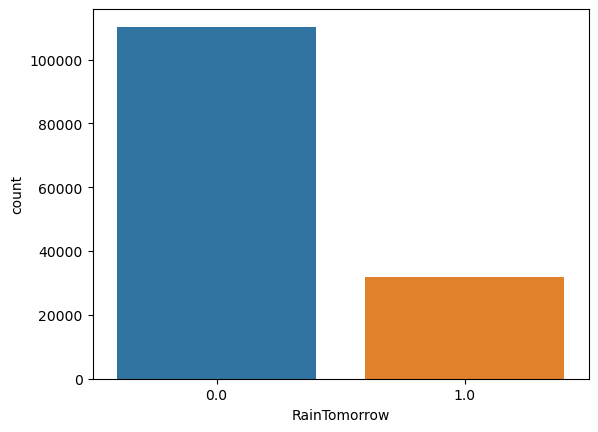

In [30]:
sns.countplot(x="RainTomorrow",data=data)

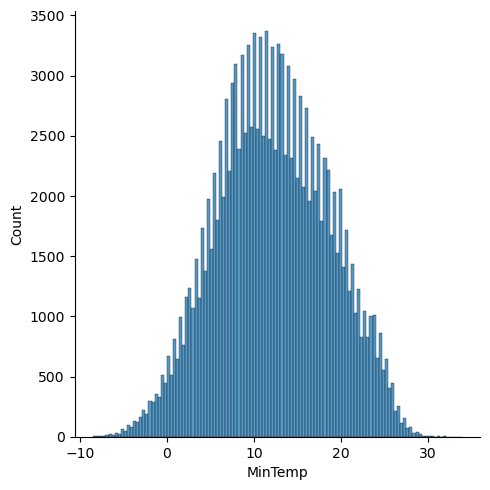

In [31]:
sns.displot(data['MinTemp'])

# splitting x and y values 

In [32]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

# Feature Scalling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
y=data['RainTomorrow']
x=data.drop('RainTomorrow',axis=1)

In [35]:
names=x.columns

In [36]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'month', 'day'],
      dtype='object')

In [37]:
sc=StandardScaler()

In [38]:
#x=sc.fit_transform(x)

In [39]:
x=pd.DataFrame(x,columns=names)

# Splitting The Data Intro Train And Test

In [40]:
from sklearn import model_selection

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1016.6,1013.9,5.0,7.0,21.4,22.2,0.0,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1018.3,1014.6,3.0,5.0,14.3,23.2,0.0,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,NaN,SW,...,1017.6,1014.9,1.0,2.0,16.6,21.5,1.0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1015.9,1012.1,1.0,1.0,23.2,29.1,0.0,2010,6,11
1867,Albury,15.7,17.6,12.4,NaN,NaN,E,20.0,ESE,E,...,1015.2,1010.5,8.0,8.0,16.5,17.3,1.0,2014,4,10


In [43]:
x_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
138175,AliceSprings,21.9,39.4,1.6,11.2,11.5,NNW,57.0,NE,N,...,1008.5,1004.1,2.0,6.0,29.8,35.4,1.0,2014,12,3
38638,WaggaWagga,20.5,37.5,0.0,9.2,8.4,WNW,59.0,ENE,N,...,1012.9,1006.5,4.0,7.0,27.3,35.7,0.0,2015,1,8
124058,SalmonGums,5.1,17.2,0.2,NaN,NaN,W,50.0,WNW,W,...,NaN,NaN,NaN,NaN,10.1,16.1,0.0,2009,8,16
99214,Adelaide,11.9,16.8,1.0,NaN,NaN,SW,28.0,WNW,SW,...,1018.5,1017.7,NaN,NaN,14.3,15.2,0.0,2016,8,31
25097,Penrith,7.5,21.3,0.0,NaN,NaN,NE,15.0,SW,NNE,...,NaN,NaN,NaN,NaN,13.7,21.1,0.0,2011,8,28


In [44]:
y_train.head()

22926     1.0
80735     0.0
121764    0.0
139821    0.0
1867      1.0
Name: RainTomorrow, dtype: float64

In [45]:
y_test.head()

138175    1.0
38638     1.0
124058    0.0
99214     0.0
25097     0.0
Name: RainTomorrow, dtype: float64

In [46]:
x_train.shape

(116368, 24)

In [47]:
x_test.shape

(29092, 24)

In [48]:
y_train.shape

(116368,)

In [49]:
y_test.shape

(29092,)

# Training And Testing The Model

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logisticRegr=LogisticRegression()

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.02584508 0.02951647 0.02928499 0.04224606 0.03040758 0.11771665
 0.0185546  0.04421614 0.01903262 0.01957841 0.01974324 0.02232462
 0.03129657 0.11714157 0.04664549 0.05313366 0.06048182 0.13159684
 0.02881086 0.0314704  0.02578789 0.01612152 0.01723894 0.02180798]


In [53]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [54]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [55]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken


# Model Evaluation

Accuracy = 0.805334602397625
ROC Area under Curve = 0.8053344276872507
Cohen's Kappa = 0.6106690686328446
Time taken = 4.565972089767456
              precision    recall  f1-score   support

         0.0    0.80071   0.81304   0.80683     22064
         1.0    0.81011   0.79762   0.80382     22063

    accuracy                        0.80533     44127
   macro avg    0.80541   0.80533   0.80532     44127
weighted avg    0.80541   0.80533   0.80532     44127



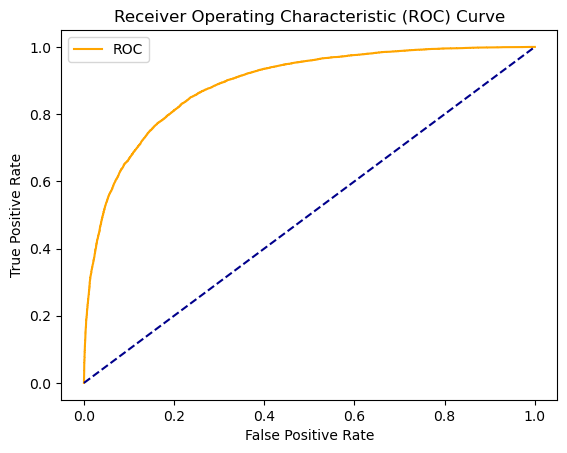

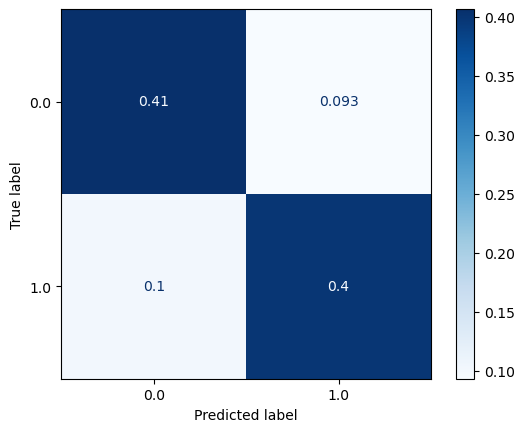

In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8691050830557255
ROC Area under Curve = 0.8691057054232297
Cohen's Kappa = 0.7382104918707681
Time taken = 0.8067443370819092
              precision    recall  f1-score   support

         0.0    0.89056   0.84164   0.86541     22064
         1.0    0.84988   0.89657   0.87260     22063

    accuracy                        0.86911     44127
   macro avg    0.87022   0.86911   0.86901     44127
weighted avg    0.87022   0.86911   0.86901     44127



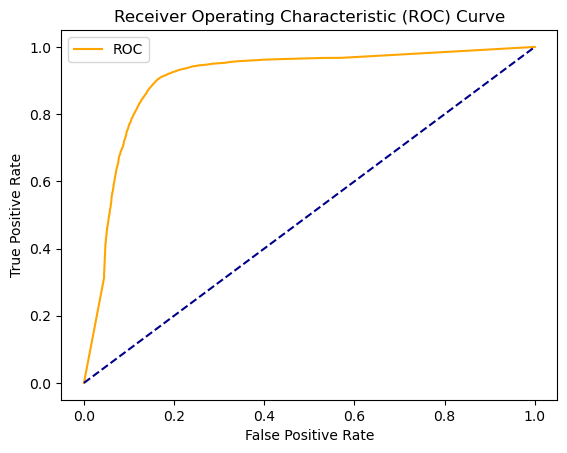

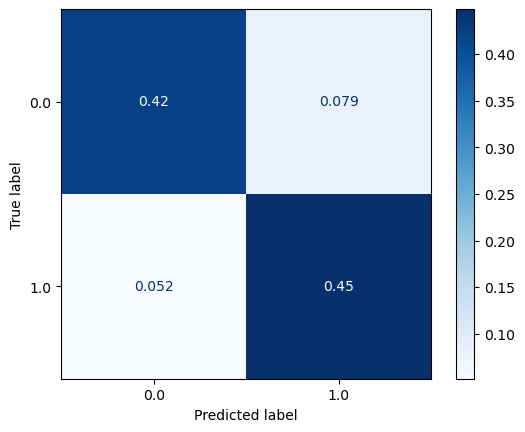

In [57]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.9273007455752714
ROC Area under Curve = 0.9273013279149822
Cohen's Kappa = 0.854601660429183
Time taken = 46.177449226379395
              precision    recall  f1-score   support

         0.0    0.95045   0.90160   0.92538     22064
         1.0    0.90641   0.95300   0.92912     22063

    accuracy                        0.92730     44127
   macro avg    0.92843   0.92730   0.92725     44127
weighted avg    0.92843   0.92730   0.92725     44127



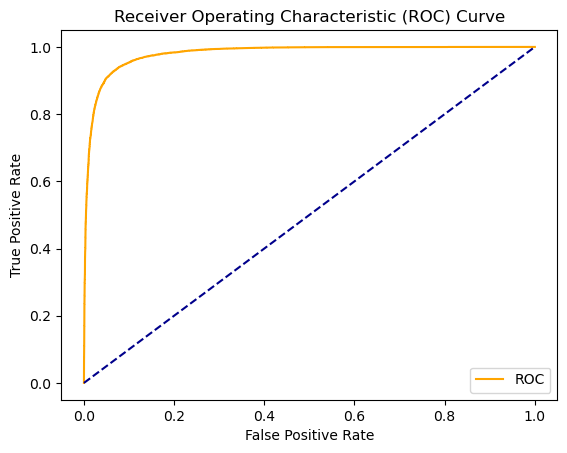

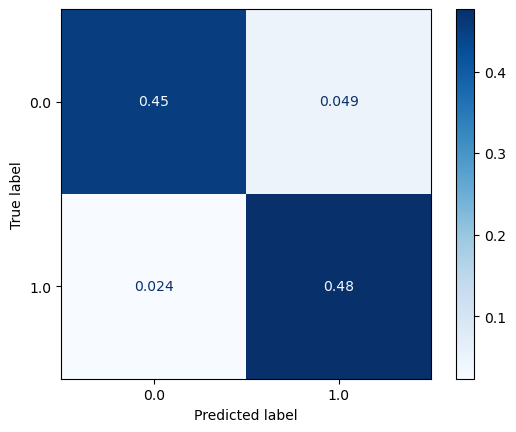

In [58]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [60]:
# XGBoost
#import xgboost as xgb
#params_xgb ={'n_estimators': 500,
            #'max_depth': 16}

#model_xgb = xgb.XGBClassifier(**params_xgb)
#model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)


# Saving the Model

In [61]:
import pickle

In [62]:
import joblib
joblib.dump(model_rf, 'model.pkl')

['model.pkl']